In [652]:
import math
del sys.modules['feature']
#import seaborn as sns
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import feature as ft

In [569]:
try:
    del df
    del df_fix
except NameError:
    pass
df = pd.read_csv("Daten/Jannis_16_06.csv",sep=";")

df['Gaze X'] = df['Gaze X'].astype(int)
df['Gaze Y'] = df['Gaze Y'].astype(int)
# Zeit in MS
df['Timestamp in ms'] = df['Timestamp'] * 1000
df['Timestamp in ms'] = df['Timestamp in ms'].astype(int)

# Generiert Geschwindigkeit (Nicht Fertig)
df
#df.to_csv("test_test.csv")
#df["Gaze Y"][1773:2324].mean()

,Index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms
0,0,0.000000,1216,1066,NaN,TrackingConfidence.HIGH,0
1,1,0.028026,1216,1066,NaN,TrackingConfidence.HIGH,28
2,2,0.048044,1232,1068,NaN,TrackingConfidence.HIGH,48
3,3,0.067060,1232,1068,NaN,TrackingConfidence.HIGH,67
4,4,0.086078,1232,1067,NaN,TrackingConfidence.HIGH,86
...,...,...,...,...,...,...,...
15878,15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102
15879,15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122
15880,15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144
15881,15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165


In [367]:
df_rad = ft.ges(df)

,Index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,Fixation
0,0,0.000000,1216,1066,NaN,TrackingConfidence.HIGH,0,1
1,1,0.028026,1216,1066,NaN,TrackingConfidence.HIGH,28,1
2,2,0.048044,1232,1068,NaN,TrackingConfidence.HIGH,48,1
3,3,0.067060,1232,1068,NaN,TrackingConfidence.HIGH,67,1
4,4,0.086078,1232,1067,NaN,TrackingConfidence.HIGH,86,1
...,...,...,...,...,...,...,...,...
15878,15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102,2445
15879,15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122,2445
15880,15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144,2445
15881,15881,328.165344,1320,572,NaN,TrackingConfidence.HIGH,328165,2445


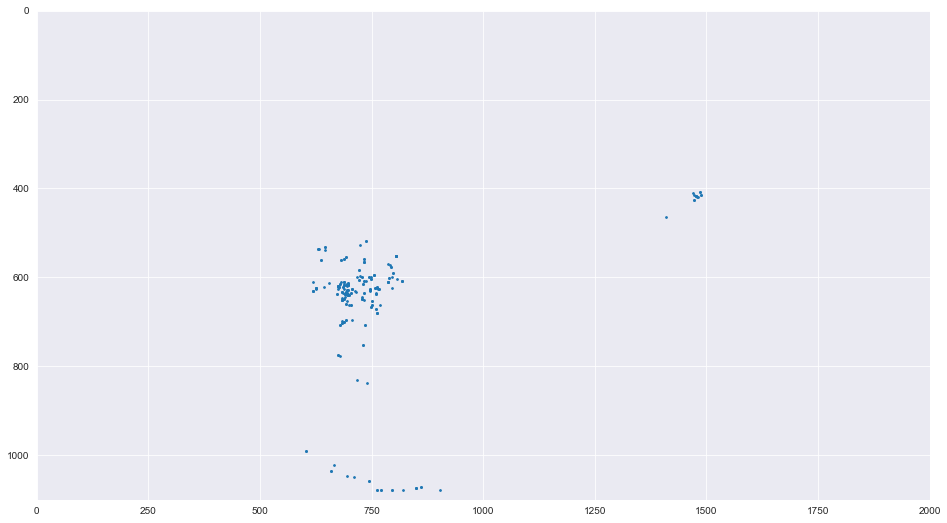

In [632]:
df2 = df[(df['Timestamp'].between(53,58) == True)]
x = df2["Gaze X"]
y = df2["Gaze Y"]
#z = df2['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 3)
plt.show()

In [653]:
try:
    del df_new
except NameError:
    pass
# Filter
 #and (df_new["dy"] > 0) == True and df_new["dx"] <= 10 == True and df_new["dx"] >= -10 == True
#df_new['dx'] = np.sqrt(df_new['dx'] ** 2)
df_new = pd.concat([df,df_rad],axis=1)
#df_new = df_new.loc[(df_new["dx"] >= 10) & (df_new["dx"] >= -10) == True]
#df_new = df_new.loc[(df_new["dy"] >= 20 * df_new["dx"]) & (df_new["dy"] > 0) == False]
#df_new = df_new.loc[(df_new["vx"] < -10) & (df_new["vx"] > 10) == False]
df_new = df_new[(df_new["vy"] <= 2300) == True]
df_new = df_new[(df_new["Gaze Y"] <= 1030) == True].reset_index()
df_new['Fixation'] = ft.fix(df_new)
df_new = df_new.loc[(df_new['v'] == 0) & (df_new['Fixation'] == 0) == False]
df_new

,index,Index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a,Fixation
0,29,29,0.577272,1318,998,NaN,TrackingConfidence.HIGH,577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,30,30,0.596290,1318,998,NaN,TrackingConfidence.HIGH,596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,31,31,0.616308,1318,998,NaN,TrackingConfidence.HIGH,616,12.0,5.0,13.0,599.0,249.0,649.0,1.0,1.0
3,32,32,0.636325,1330,1003,NaN,TrackingConfidence.HIGH,636,-1.0,11.0,11.0,-52.0,578.0,580.0,0.0,1.0
4,33,33,0.655343,1329,1014,NaN,TrackingConfidence.HIGH,655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14524,15877,15877,328.069459,1316,589,NaN,TrackingConfidence.HIGH,328069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1321.0
14525,15878,15878,328.102475,1316,589,NaN,TrackingConfidence.HIGH,328102,-2.0,-8.0,8.0,-99.0,399.0,411.0,0.0,1321.0
14526,15879,15879,328.122494,1314,581,NaN,TrackingConfidence.HIGH,328122,2.0,0.0,2.0,91.0,0.0,91.0,1.0,1321.0
14527,15880,15880,328.144421,1316,581,NaN,TrackingConfidence.HIGH,328144,4.0,-9.0,9.0,191.0,430.0,470.0,0.0,1321.0


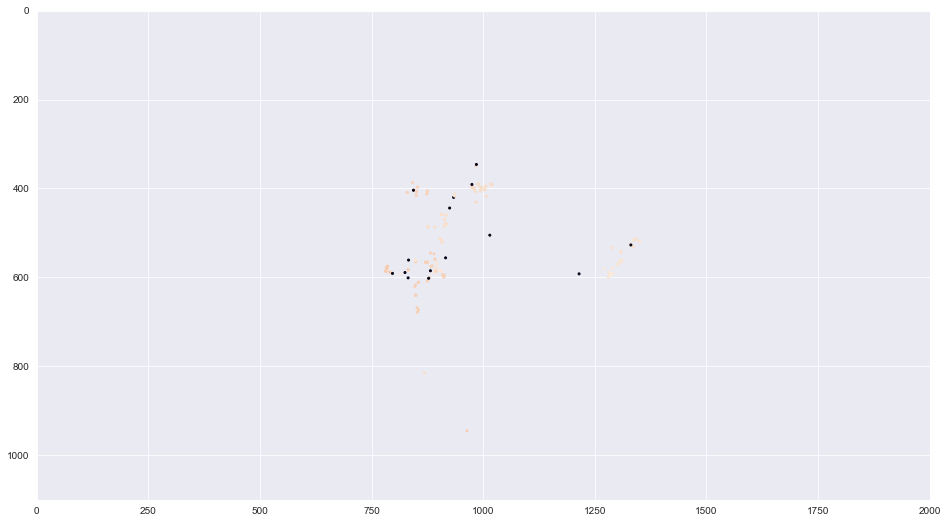

In [659]:
df_filter = df_new[(df_new['Timestamp'].between(80,85) == True)]
#df_filter = df_filter[(df_new["Fixation"] == 0) == True]
x = df_filter["Gaze X"]
y = df_filter["Gaze Y"]
z = df_filter['Fixation']
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([0,2000,1100,0])
plt.scatter(x,y, s = 4, c=z)
plt.show()

In [656]:
df_filter[['Gaze X','Gaze Y','Fixation','v','d']]
#df_test = df_filter.loc[(df_filter['Fixation'] == 0) & (df_filter['v'] != 0) == True]
#df_test[['Gaze X','Gaze Y','Fixation','v','d']]

,Gaze X,Gaze Y,Fixation,v,d
485,1157,512,28.0,0.0,0.0
486,1157,512,28.0,306.0,5.0
487,1162,515,28.0,0.0,0.0
488,1162,515,28.0,1175.0,22.0
489,1184,511,28.0,0.0,0.0
...,...,...,...,...,...
714,1070,456,37.0,502.0,10.0
715,1060,457,37.0,0.0,0.0
716,1060,457,37.0,410.0,7.0
721,1082,574,38.0,0.0,0.0


In [641]:
df_test3 = df_new.loc[(df_new['v'] == 0) & (df_new['Fixation'] == 0) == True]
df_test3

,index,Index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,dx,dy,d,vx,vy,v,a,Fixation
6,48,48,0.950374,1348,10,NaN,TrackingConfidence.HIGH,950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,72,72,1.418787,1019,730,NaN,TrackingConfidence.HIGH,1418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,194,194,3.824339,1105,736,NaN,TrackingConfidence.HIGH,3824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,200,200,3.944071,1092,906,NaN,TrackingConfidence.HIGH,3944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133,203,203,4.001289,1144,793,NaN,TrackingConfidence.HIGH,4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14369,15775,15775,325.866244,1249,468,NaN,TrackingConfidence.HIGH,325866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14413,15822,15822,326.884131,1499,646,NaN,TrackingConfidence.HIGH,326884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14414,15824,15824,326.924795,1596,854,NaN,TrackingConfidence.HIGH,326924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14424,15842,15842,327.313769,1476,713,NaN,TrackingConfidence.HIGH,327313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
df_new[(df_new['Timestamp'].between(183,188) == True)].reset_index()

ValueError: cannot insert level_0, already exists

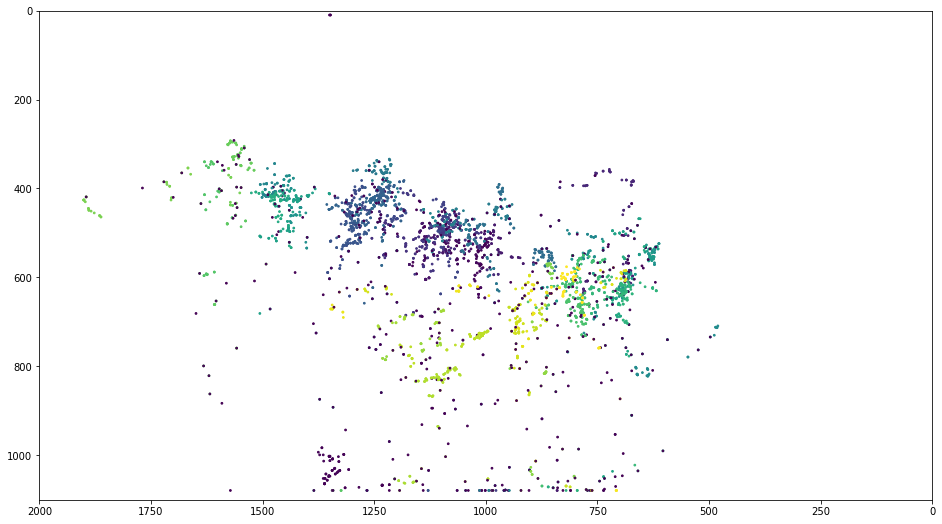

In [203]:
x = df_new["Gaze X"][0:4000]
y = df_new["Gaze Y"][0:4000]
z = df_new['Fixation'][0:4000]
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(9)
#t = df["Timestamp"].head(100)
plt.axis([2000,0,1100,0])
plt.scatter(x,y, s = 3, c=z)
plt.show()

In [109]:
df_new[(df_new['Fixation']) == 0]

,level_0,index,Timestamp,Gaze X,Gaze Y,Lost Track,Confidence,Timestamp in ms,Fixation,dx,dy,d,vx,vy,v,a
2460,2567,2693,53.298165,1410,465,NaN,TrackingConfidence.HIGH,53298,0,-673.0,54.0,675.0,-26835.0,2153.0,26921.0,-1.0
2463,2570,2696,53.361927,725,526,NaN,TrackingConfidence.HIGH,53361,0,-33.0,28.0,43.0,-1735.0,1472.0,2275.0,0.0
2469,2576,2702,53.477920,682,560,NaN,TrackingConfidence.HIGH,53477,0,-37.0,-29.0,47.0,-1945.0,1524.0,2471.0,0.0
2475,2582,2708,53.597801,632,536,NaN,TrackingConfidence.HIGH,53597,0,4.0,24.0,24.0,210.0,1262.0,1279.0,0.0
2499,2619,2753,54.505104,707,696,NaN,TrackingConfidence.HIGH,54505,0,-4.0,-35.0,35.0,-199.0,1748.0,1759.0,0.0
2505,2625,2759,54.624135,697,638,NaN,TrackingConfidence.HIGH,54624,0,-9.0,-28.0,29.0,-473.0,1472.0,1546.0,0.0
2508,2628,2762,54.681196,688,610,NaN,TrackingConfidence.HIGH,54681,0,-16.0,27.0,31.0,-841.0,1419.0,1650.0,0.0
2560,2680,2814,55.706983,620,611,NaN,TrackingConfidence.HIGH,55706,0,61.0,-1.0,61.0,3209.0,52.0,3209.0,1.0
2565,2685,2819,55.803891,714,631,NaN,TrackingConfidence.HIGH,55803,0,37.0,23.0,43.0,1944.0,1208.0,2289.0,1.0
2567,2687,2821,55.841933,751,654,NaN,TrackingConfidence.HIGH,55841,0,12.0,27.0,29.0,592.0,1334.0,1459.0,0.0
